In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
# Load a GeoDataFrame containing regions in Ghana
regions = gpd.read_file("..\GeoSpatialData\ghana\ghana\Regions\Map_of_Regions_in_Ghana.shp")
print(regions.crs)

epsg:32630


How do you interpret that?

Coordinate reference systems are referenced by European Petroleum Survey Group (EPSG) codes.

This GeoDataFrame uses EPSG 32630, which is more commonly called the "Mercator" projection. This projection preserves angles (making it useful for sea navigation) and slightly distorts area.

However, when creating a GeoDataFrame from a CSV file, we have to set the CRS. EPSG 4326 corresponds to coordinates in latitude and longitude.

In [5]:
# Create a DataFrame with health facilities in Ghana
facilities_df = pd.read_csv("..\GeoSpatialData\ghana\ghana\health_facilities.csv")

# Convert the DataFrame to a GeoDataFrame
facilities = gpd.GeoDataFrame(facilities_df, geometry=gpd.points_from_xy(facilities_df.Longitude, facilities_df.Latitude))

# Set the coordinate reference system (CRS) to EPSG 4326
facilities.crs = {'init': 'epsg:4326'}

# View the first five rows of the GeoDataFrame
facilities.head()

e:\SelfLearning\Kaggle\kaggleEnv\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


<AxesSubplot:>

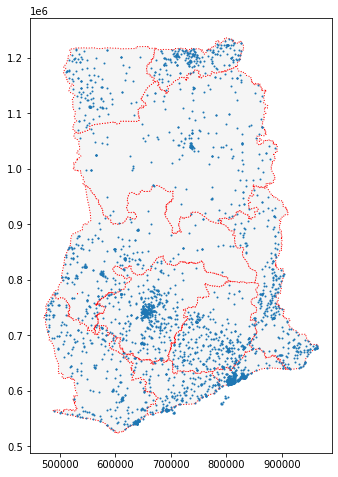

In [9]:
# Create a map
ax = regions.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='red')
facilities.to_crs(epsg=32630).plot(markersize=1, ax=ax)

In case the EPSG code is not available in GeoPandas, we can change the CRS with what's known as the "proj4 string" of the CRS. For instance, the proj4 string to convert to latitude/longitude coordinates is as follows:

In [10]:
# Change the CRS to EPSG 4326
regions.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs").head()

,Region,geometry
0,Ashanti,"POLYGON ((-1.30985 7.62302, -1.30786 7.62198, ..."
1,Brong Ahafo,"POLYGON ((-2.54567 8.76089, -2.54473 8.76071, ..."
2,Central,"POLYGON ((-2.06723 6.29473, -2.06658 6.29420, ..."
3,Eastern,"POLYGON ((-0.21751 7.21009, -0.21747 7.20993, ..."
4,Greater Accra,"POLYGON ((0.23456 6.10986, 0.23484 6.10974, 0...."


You can get the x- and y-coordinates of a Point from the x and y attributes, respectively.

In [13]:
# Get the x-coordinate of each point
facilities.geometry.head().x

0   -1.96317
1   -1.58592
2   -1.34982
3   -1.61098
4   -1.61098
dtype: float64

And, you can get the length of a LineString from the length attribute.

Or, you can get the area of a Polygon from the area attribute.

In [14]:
# Calculate the area (in square meters) of each polygon in the GeoDataFrame 
regions.loc[:, "AREA"] = regions.geometry.area / 10**6

print("Area of Ghana: {} square kilometers".format(regions.AREA.sum()))
print("CRS:", regions.crs)
regions.head()

Area of Ghana: 239584.5760055668 square kilometers
CRS: epsg:32630


,Region,geometry,AREA
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84...",24379.017777
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96...",40098.168231
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69...",9665.626760
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79...",18987.625847
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67...",3706.511145
